# Individual Rides Made in a Bike-sharing System

## Investigation Overview

This study investigates when most trip were performed in terms of duration and day of the week. Additionally, it investigates how features like age group and gender depends on if a user is a subscriber or customer.

## Dataset Overview

The dataset consisted of 183412 ford gobike entries and 16 features. After preliminary wrangling, the entries were reduced to 174952 while the features to 12. 

In [114]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [115]:
# load in the dataset into a pandas dataframe
ford_go = pd.read_csv('fordgobike-tripdata.csv')

In [116]:
# Dropping columns with null values
column = ['start_station_id','start_station_name','end_station_id','end_station_name', 'member_birth_year','member_gender']
ford_go.dropna(subset=column, inplace= True);

In [117]:
# Changing the start date and end date to datetime objects instead of objects
ford_go['start_date'] = pd.to_datetime(ford_go['start_time']).dt.date
ford_go['start_time']= pd.to_datetime(ford_go['start_time']).dt.time
ford_go['end_date'] = pd.to_datetime(ford_go['end_time']).dt.date
ford_go['end_time'] = pd.to_datetime(ford_go['end_time']).dt.time

In [118]:
# Changing end_date to pandas datetime format
ford_go['end_date'] = pd.to_datetime(ford_go['end_date'], format='%Y-%m-%d')

In [119]:
#Obtaining the excert day of the week and month
ford_go['day']=ford_go['end_date'].dt.day_name()
ford_go['month']= ford_go['end_date'].dt.month_name()

In [120]:
ordinal_var_dict = {'end_date': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']}
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict['end_date'])
ford_go['day'] = ford_go['day'].astype(ordered_var)

In [121]:
#Converting duration in seconds to hours 
ford_go['duration_minute'] = ford_go['duration_sec']/60
ford_go.duration_minute = ford_go.duration_minute.astype('int64')

In [122]:
# Getting Age as at when this data was obtained
ford_go['age'] = 2019 - ford_go['member_birth_year']

In [123]:
#Converting the age column to integer.
ford_go.age = ford_go.age.astype('int64')

In [124]:
col_list=['start_time','end_time','start_station_id','end_station_id','bike_id','duration_sec','member_birth_year','start_date','end_date']
ford_go.drop(col_list, axis=1, inplace=True)

### Distribution of  age 

From this plot, it was observed that the age distribution of the riders is skewed to the right, that is, positively skewed. This indicate that the mean of their ages is greater than the median and mode.

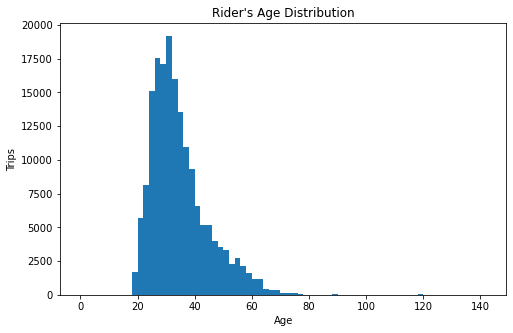

In [125]:
# Creating a histogram of the age column
plt.figure(figsize=[8, 5])
bins = np.arange(0, ford_go['age'].max()+2, 2)
plt.hist(data = ford_go, x = 'age', bins = bins)
plt.xlabel('Age')
plt.ylabel('Trips')
plt.title("Rider's Age Distribution");

### Plot showing the age group with the highest trips

This plot shows that most of trips were performed by users within the age group of 20-29 and 30-39. However, users within the age group of 70-79 and 80-141 rarely performed any trip.

In [126]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 141] 
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-141']
ford_go['age'] = pd.cut(ford_go['age'], bins, labels=labels)

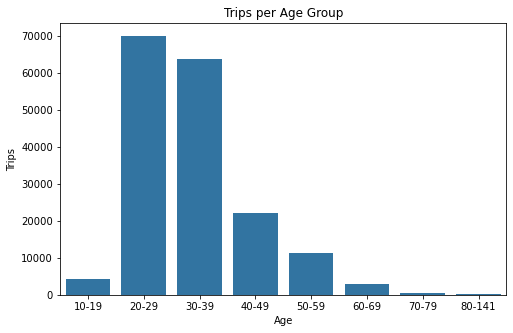

In [127]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = ford_go, x = 'age', color = base_color)
plt.xlabel('Age')
plt.ylabel('Trips')
plt.title("Trips per Age Group");

###  Distribution of days with the highest trips

This graph shows that most trips were performed on thursday, followed by tuesday. Additionally, the numbers of trips performed on saturday and sunday were almost thesame.

In [128]:
# a function for bar graphs
def bar_chart(col_name, title,x,y):
    plt.figure(figsize=[8, 5])
    base_color= sb.color_palette()[0]
    #freq= ford_go[col_name].value_counts().index
    sb.countplot(data= ford_go, x=col_name, color= base_color);

    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

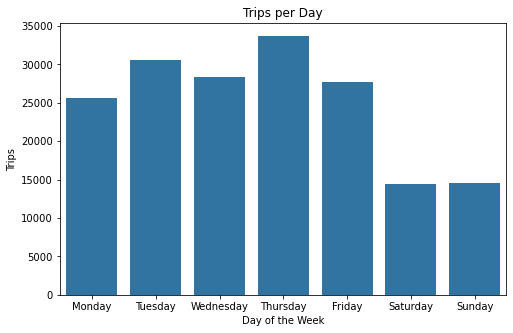

In [129]:
bar_chart('day',"Trips per Day","Day of the Week",'Trips')

###  Visualing the users' gender based on age group

This plot gave more insight on how the rider's ages and their gender are related. It was observed that most trips were performed by males who were between the age group between of 20-29 and 30-39. 

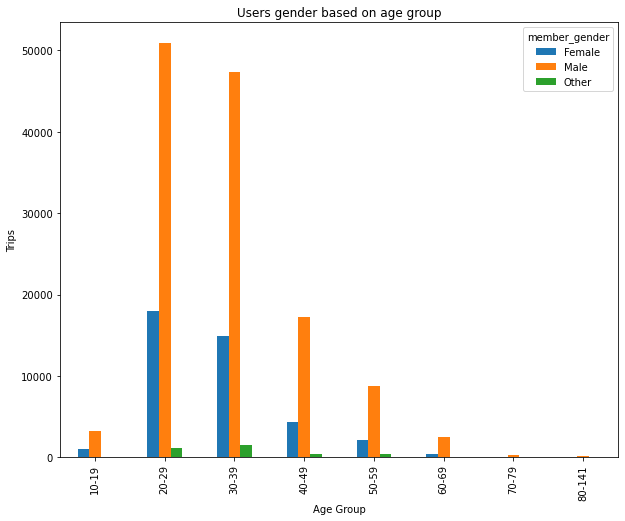

In [130]:
ford_go.groupby(['age'])['member_gender'].count()
ford_go.groupby('age')['member_gender'].value_counts().unstack().plot(kind='bar',figsize=(10,8))
plt.title('Users gender based on age group')
plt.xlabel('Age Group')
plt.ylabel('Trips');
plt.show()

### Relationship between gender and user type 

The heatmap revealed that most riders were male and they were subscribers. Additionally, female subscribers were three times greater than male customers. 

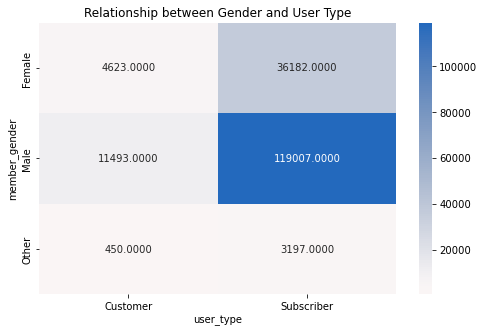

In [131]:
# A heat map of gender and user type
plt.figure(figsize=[8,5])
counts= ford_go.groupby(['member_gender', 'user_type']).size()
counts= counts.reset_index(name= 'count')
counts=counts.pivot(index='member_gender', columns='user_type', values= 'count');
sb.heatmap(counts, annot= True, fmt='.4f', cmap = 'vlag_r', center = 0)

plt.title('Relationship between Gender and User Type');



### Relationship between age group, gender, trip duration

This plot revealed that the age group between 20-29 and 30-39 had the highest trip for both male and female. However, the age group between 20-29 had the highest trip for users who did not indicate their gender.

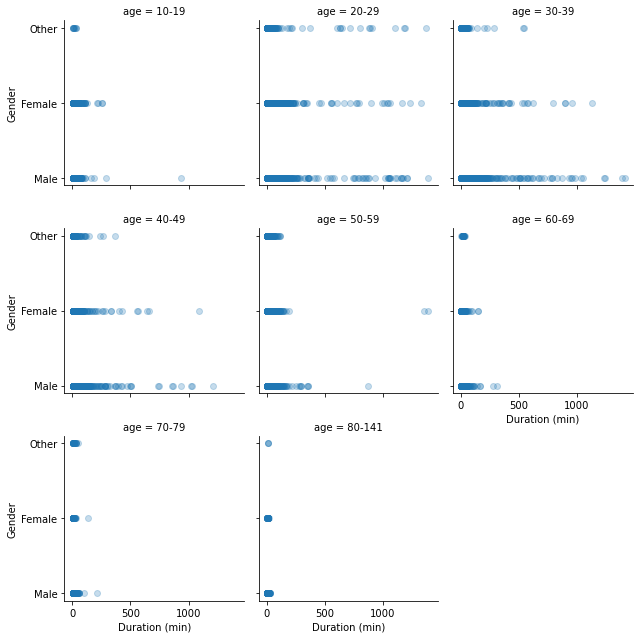

In [132]:
# create faceted scatter plot on levels of gender
g = sb.FacetGrid(data = ford_go, col = 'age', col_wrap = 3, size = 3)
g.map(plt.scatter,  'duration_minute','member_gender', alpha=0.25)
g.set_xlabels('Duration (min)')
g.set_ylabels('Gender')

plt.show();

In [133]:
!jupyter nbconvert "Project_Ford_GoBike_Part II.ipynb" --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Project_Ford_GoBike_Part II.ipynb to slides
[NbConvertApp] Writing 708210 bytes to Project_Ford_GoBike_Part II.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\HP\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  Fil